# HW 3 K-means Clustering



---

#### Name: 吳原博
#### Student ID: 0816004

---

## 助教好 😀
> 程式碼的解釋會放在每個程式碼區塊上方的 markdown 裡，謝謝!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
import random as rd
from sklearn.metrics import *
%matplotlib inline

# Variables

In [2]:
wheet_col = ['area','perimeter','compactness','kernel_length','kernel_width','asymmetry','length_of_kernel_groove','label']

# Data processing
我發現原本的資料並不整齊，為了讓排版更美觀有些地方有連續兩個 tab，因此我先處理所有連續的 tab 才用 read_csv 讀取資料

In [3]:
# 修改原資料，使其變得整齊而可以用 read_csv 讀取
i = 0
out = ""
with open('seeds_dataset.txt','r') as file:
    for f in file:
        i = i + 1
        f = f.replace("\t\t","\t")
        out += f
with open("wheet_data_revised.txt",'w') as file:
    file.write(out)
df = pd.read_csv('wheet_data_revised.txt',names=wheet_col,sep='\t')
data_y = np.array(df['label'])
data = df.drop('label',axis=1)
data = np.array(data)

# K-means
我透過三個函式完成 k means clustering :
1. **cluster**    
    根據輸入的中心點，將每筆資料分配到對應的 group 裡面  
2. **loc_center**  
    根據分好群的資料點計算出每個 group 的新中心點  
3. **init**  
    隨機升成三組中心點  

接下來就根據 k means 的演算法完成，我把迴圈停止的條件設定為 : 當 group 的成員不再異動則停止迴圈

In [4]:
# 將每個點分到群組裡
def cluster(center,data):
    group = [[] for i in range(3)]
    for i in range(data.shape[0]):
        g = 0
        min_dis = float('Infinity')
        for j in range(3):
            distance = np.linalg.norm(center[j]-data[i])
            if distance < min_dis:
                min_dis = distance
                g = j
        group[g].append(i)
    return group

# 計算每個群組的中心點
def loc_center(group,data):
    center = [[] for i in range(3)]
    for i in range(3):
        for j in range(data.shape[1]):
            center[i].append(np.mean(data[group[i]].transpose()[j]))
    return center

# 隨機產生三組起始中心點
def init(data):
    init_center = []
    for i in range(data.shape[1]):
        rnd = []
        for j in range(3):
            rnum = np.random.uniform(data[:,i].min(),data[:,i].max())
            rnd.append(rnum)
        init_center.append(rnd)
    init_center = np.array(init_center).transpose(1,0)
    return init_center

init_center = init(data)
group = cluster(init_center,data)
center = loc_center(group,data)
group_prt = []
while group != group_prt:
    group_prt = group
    group = cluster(center,data)
    center = loc_center(group,data)
# print(group)
group_label = []
for g in group:
    lbl = 0
    max_i = 0
    for i in range(3):
        temp = data_y[g].tolist().count(i+1)
        # print(temp)
        if temp > max_i:
            max_i = temp
            lbl = i+1
    group_label.append(lbl)
# print(group_label)
result = [0] * 210
for i in range(3):
    for g in group[i]:
        result[g] = group_label[i]
# print(result.count(1))
# print(result.count(2))
# print(result.count(3))

# Results
結果如下，我將資料整理好以 dataframe 表格輸出

In [5]:
matrix = confusion_matrix(data_y,result,labels=[1,2,3])
acc = accuracy_score(data_y,result)
recall = recall_score(data_y,result,average=None)
prec = precision_score(data_y,result,average=None)
form = pd.DataFrame(matrix,columns=['predicted 1','predicted 2','predicted 3'],index=['1','2','3'])
print('confusion matrix')
display(form)
df = [acc]
form = pd.DataFrame(df,columns=['accuracy score'],index=[''])
print('accuracy, recall and precision score')
display(form)
df = [recall,prec]
form = pd.DataFrame(df,columns=['pos label = 1','pos label = 2','pos label = 3'],index=['recall score','prec score'])
display(form)

confusion matrix


,predicted 1,predicted 2,predicted 3
1,57,1,12
2,10,60,0
3,0,0,70


accuracy, recall and precision score


,accuracy score
,0.890476


,pos label = 1,pos label = 2,pos label = 3
recall score,0.814286,0.857143,1.000000
prec score,0.850746,0.983607,0.853659


# Question
我將資料以 pca 濃縮成兩個 attribute，重新以 k means 計算後將結果畫成散布圖，如下  
其中，那些顏色稍有不同的星星代表各個群裡面的中心點

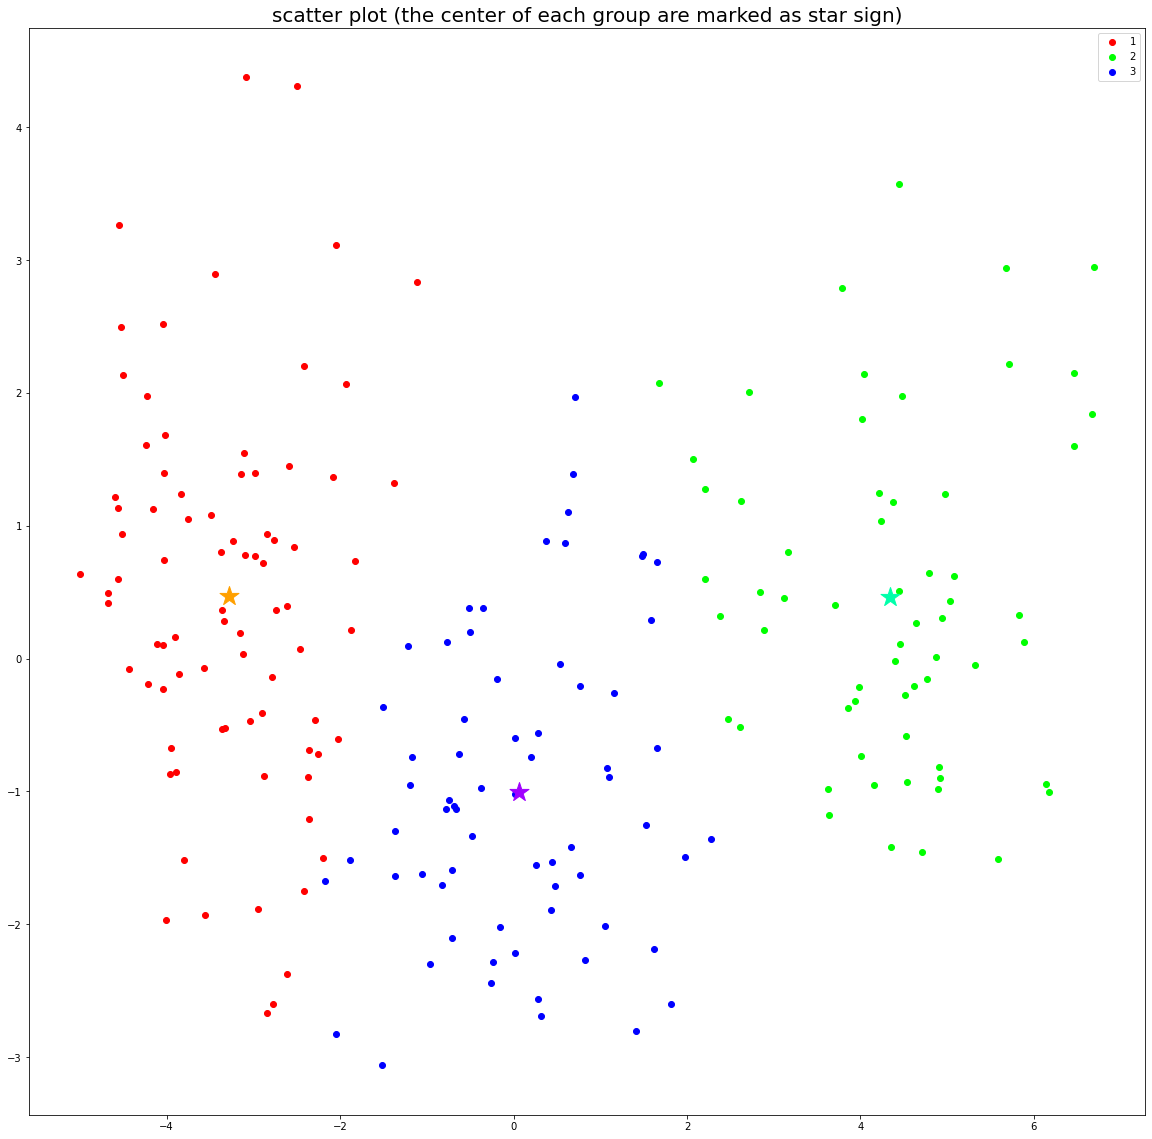

In [6]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

init_center = init(data_pca)
group = cluster(init_center,data_pca)
center = loc_center(group,data_pca)
group_prt = []
while group != group_prt:
    group_prt = group
    group = cluster(center,data_pca)
    center = loc_center(group,data_pca)
# print(group)
# print(center)
group_label = []
for g in group:
    lbl = 0
    max_i = 0
    for i in range(3):
        temp = data_y[g].tolist().count(i+1)
        # print(temp)
        if temp > max_i:
            max_i = temp
            lbl = i+1
    group_label.append(lbl)
# print(group_label)
result_pca = [0] * 210
for i in range(3):
    for g in group[i]:
        result_pca[g] = group_label[i]

Color = ('#FF0000', '#00FF00', '#0000FF')
Color_light = ('#FFA000', '#00FFAA', '#A000FF')
plt.figure(figsize=(20,20))
plt.title('scatter plot (the center of each group are marked as star sign)',fontsize=20)
plt.scatter(data_pca[group[0]][:,0],data_pca[group[0]][:,1],label='1',color=Color[0])
plt.scatter(data_pca[group[1]][:,0],data_pca[group[1]][:,1],label='2',color=Color[1])
plt.scatter(data_pca[group[2]][:,0],data_pca[group[2]][:,1],label='3',color=Color[2])
plt.scatter(center[0][0],center[0][1],color=Color_light[0],marker='*',s=400)
plt.scatter(center[1][0],center[1][1],color=Color_light[1],marker='*',s=400)
plt.scatter(center[2][0],center[2][1],color=Color_light[2],marker='*',s=400)
plt.legend()
plt.show()

# Compare and Conclusion
我在 k means 裡面遇到比較大的困難應該是一開始處理不整齊的資料那邊  
因為資料看上去有被整理過，但是讀取時卻又一直出現 NaN，讓我搞了好一陣子才發現問題在哪裡